<a href="https://colab.research.google.com/github/ananthu-raj/A-novel-approach-to-Entity-Resolution/blob/main/entity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entity Resolution**

In [19]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math
import warnings
%matplotlib inline

# Text datasets
from bs4 import BeautifulSoup
import nltk
import sklearn
import re
import string
# For downloading and importing data
import os
import urllib
import itertools
import tarfile
from tqdm import tqdm

# unit test case
import unittest as Test

import torch
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [20]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
from keras import backend as K

In [21]:
am = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/am.csv')
go = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/go.csv')
match = pd.read_csv('https://raw.githubusercontent.com/ananthu-raj/A-novel-approach-to-Entity-Resolution/main/Amzon_GoogleProducts_perfectMapping.csv')

In [22]:
am

,a_id,a_title,a_description,a_price
0,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.00
1,b000g80lqo,peachtree by sage premium accounting for nonpr...,peachtree premium accounting for nonprofits 20...,599.99
2,b0006se5bq,singing coach unlimited,singing coach unlimited - electronic learning ...,99.99
3,b000ehpzv8,emc retrospect 7.5 disk to disk windows,emc retrospect 7.5 disk to diskcromwindows,0.00
4,b00021xhzw,adobe after effects professional 6.5 upgrade f...,upgrade only; installation of after effects st...,499.99
...,...,...,...,...
1243,b000in8mj0,photostory on cd & dvd 5,magix photostory on cd and dvd 5 answers the q...,19.99
1244,b000cs3s2c,flash remoting 1 alp ret eng cd 2u,- marketing information: macromedia flash remo...,3314.09
1245,b000h1df7w,dragon naturally speaking standard v9,dragon naturallyspeaking 9 (standard edition) ...,99.99
1246,b000p9cr66,mediarecover,mediarecover gives you the ability to recover ...,29.99


In [23]:
go

,g_id,g_ititle,g_description,g_price
0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,38.99
1,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,8.49
2,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,637.99
3,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,12.95
4,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,805.99
...,...,...,...,...
3030,http://www.google.com/base/feeds/snippets/1487...,jumpstart(r) advanced 1st grade,prepare your child for the 1st grade and beyon...,19.99
3031,http://www.google.com/base/feeds/snippets/1491...,ibm(r) viavoice(r) advanced edition 10,ibm viavoice advanced edition release 10 is a ...,78.95
3032,http://www.google.com/base/feeds/snippets/1497...,xbox 360: gears of war,as marcus fenix you fight a war against the im...,59.99
3033,http://www.google.com/base/feeds/snippets/1498...,documents to go premium 7.0,this pda software enables you to use your docu...,49.99


In [24]:
match

,idAmazon,idGoogleBase
0,b000jz4hqo,http://www.google.com/base/feeds/snippets/1844...
1,b00004tkvy,http://www.google.com/base/feeds/snippets/1844...
2,b000g80lqo,http://www.google.com/base/feeds/snippets/1844...
3,b0006se5bq,http://www.google.com/base/feeds/snippets/1842...
4,b00021xhzw,http://www.google.com/base/feeds/snippets/1843...
...,...,...
1295,b00005bigp,http://www.google.com/base/feeds/snippets/1773...
1296,b000h1df7w,http://www.google.com/base/feeds/snippets/1773...
1297,b000p9cr66,http://www.google.com/base/feeds/snippets/1772...
1298,b000p9cr66,http://www.google.com/base/feeds/snippets/1321...


## **Data Cleaning**

In [25]:
#am
newam = pd.DataFrame(np.repeat(am.values, len(go), axis=0))
newam.columns = am.columns
#go
newgo = pd.concat([go[:len(go)]]*len(am), ignore_index=True)
# adding newam and newgo along columns
res = [newam, newgo]
df = pd.concat(res, axis=1)

In [26]:
# Converting to proper datatypes by default 
df = df.convert_dtypes()
print(df.dtypes)

a_id              string
a_title           string
a_description     string
a_price          Float64
g_id              string
g_ititle          string
g_description     string
g_price           string
dtype: object


In [27]:
a_list = df['a_id'].tolist()
g_list = df['g_id'].tolist()
# Function to merge two lists pair wise
def merge(list1, list2):
    merged_list = [[list1[i], list2[i]] for i in range(0, len(list1))]
    return merged_list
x = merge(a_list,g_list)
ad = match['idAmazon'].tolist()
gd = match['idGoogleBase'].tolist()
y = merge(ad,gd)
def find(lst1,lst2):
    result = []
    for i in tqdm(range(len(lst1))):
        for j in range(len(lst2)):
            if lst1[i]==lst2[j]:
                result.append(i)
            
    return result

In [28]:
l = find(x,y)

100%|██████████| 3787680/3787680 [07:45<00:00, 8131.49it/s]


In [29]:
list_of_zeros = [0] * len(df)
for i in tqdm(range(len(l))):
    list_of_zeros.pop(l[i])
list_of_zeros
for i in tqdm(range(len(l))):
    list_of_zeros.insert(l[i],1)
df['match'] = list_of_zeros

100%|██████████| 1161/1161 [00:00<00:00, 1263.42it/s]


In [30]:
df

,a_id,a_title,a_description,a_price,g_id,g_ititle,g_description,g_price,match
0,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1112...,learning quickbooks 2007,learning quickbooks 2007,38.99,0
1,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1153...,superstart! fun with reading & writing!,fun with reading & writing! is designed to hel...,8.49,0
2,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1134...,qb pos 6.0 basic software,qb pos 6.0 basic retail mngmt software. for re...,637.99,0
3,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1204...,math missions: the amazing arcade adventure (g...,save spectacle city by disrupting randall unde...,12.95,0
4,b0006zf55o,ca international - arcserve lap/desktop oem 30pk,oem arcserve backup v11.1 win 30u for laptops ...,0.0,http://www.google.com/base/feeds/snippets/1224...,production prem cs3 mac upgrad,adobe cs3 production premium mac upgrade from ...,805.99,0
...,...,...,...,...,...,...,...,...,...
3787675,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1487...,jumpstart(r) advanced 1st grade,prepare your child for the 1st grade and beyon...,19.99,0
3787676,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1491...,ibm(r) viavoice(r) advanced edition 10,ibm viavoice advanced edition release 10 is a ...,78.95,0
3787677,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1497...,xbox 360: gears of war,as marcus fenix you fight a war against the im...,59.99,0
3787678,b000j588g4,photo explosion 3.0,photo explosion 3.0,29.99,http://www.google.com/base/feeds/snippets/1498...,documents to go premium 7.0,this pda software enables you to use your docu...,49.99,0


In [31]:
df.match.value_counts()

0    3786519
1       1161
Name: match, dtype: int64

In [32]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787680 entries, 0 to 3787679
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   a_id           string 
 1   a_title        string 
 2   a_description  string 
 3   a_price        Float64
 4   g_id           string 
 5   g_ititle       string 
 6   g_description  string 
 7   g_price        string 
 8   match          int64  
dtypes: Float64(1), int64(1), string(7)
memory usage: 7.7 GB


## **Text Preprocessing**

In [33]:
df = df.drop(columns=["a_id","g_id",'a_price', 'g_price'])

In [ ]:
# Removing punctuations
data=df.iloc[:,0:4]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [ ]:
data

In [ ]:
data.info(memory_usage="deep")

## **Handling Imbalanced Class Labels**

## **Trying LSTM**

## **Processing with 'Title' column**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of matches and non matches')

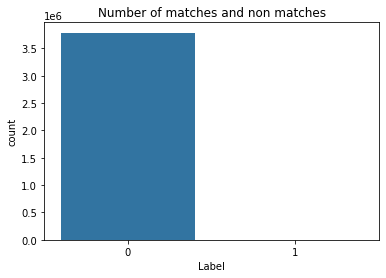

In [ ]:
sns.countplot(df.match)
plt.xlabel('Label')
plt.title('Number of matches and non matches')

### We see that the class labels are extremely imbalanced.

## Input and Output

In [ ]:
df.columns

Index(['a_id', 'a_title', 'a_description', 'a_price', 'g_id', 'g_ititle',
       'g_description', 'g_price', 'match'],
      dtype='object')

In [ ]:
X = df.a_title
Y = df.match
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

## Splitting into training and test set

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

Process the data

Tokenize the data and convert the text to sequences.
Add padding to ensure that all the sequences have the same shape.
There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

**RNN**

Define the RNN structure.

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

## Fit on training Data

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
20123/20123 [==============================] - 211s 10ms/step - loss: 0.0056 - accuracy: 0.9997 - val_loss: 0.0071 - val_accuracy: 0.9997
Epoch 2/10
20123/20123 [==============================] - 205s 10ms/step - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.0069 - val_accuracy: 0.9997


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

## Applying on Test Data



In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

17755/17755 [==============================] - 72s 4ms/step - loss: 0.0058 - accuracy: 0.9997


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.006
  Accuracy: 1.000


## **Processing with 'description' column**

In [ ]:
df.columns

Index(['a_id', 'a_title', 'a_description', 'a_price', 'g_id', 'g_ititle',
       'g_description', 'g_price', 'match'],
      dtype='object')

In [ ]:
X = df.a_description
Y = df.match
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

In [ ]:
torch.cuda.is_available()